<a href="https://colab.research.google.com/github/ahmedalaaseif/Task1-ENG-13/blob/master/latest_training_yolo_tiny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
# Mount Google Drive to be able to access the data saved there
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 13775 (delta 16), reused 23 (delta 10), pack-reused 13738
Receiving objects: 100% (13775/13775), 12.36 MiB | 7.00 MiB/s, done.
Resolving deltas: 100% (9388/9388), done.


In [3]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [5]:
# !wget https://pjreddie.com/media/files/darknet53.conv.74
!wget https://pjreddie.com/media/files/yolov3-tiny.weights
# !wget https://pjreddie.com/media/files/yolov3-spp.weights

--2020-06-27 08:22:01--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  2.30MB/s    in 15s     

2020-06-27 08:22:17 (2.23 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [6]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [7]:
!./darknet partial cfg/yolov3-tiny-custom.cfg yolov3-tiny.weights yolov3-tiny.conv.13 13

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 GPU isn't used 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2  

In [10]:
!./darknet detector train "/content/darknet/obj.data" "/content/darknet/cfg/yolov3-tiny-custom.cfg" "/content/darknet/yolov3-tiny.conv.13" -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 1051327, rewritten_bbox = 2.668247 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.737369, GIOU: 0.722414), Class: 0.999388, Obj: 0.622163, No Obj: 0.002556, .5R: 1.000000, .75R: 0.434783, count: 23, class_loss = 0.318714, iou_loss = 0.160013, total_loss = 0.478728 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.746222, GIOU: 0.735603), Class: 0.996244, Obj: 0.554773, No Obj: 0.000734, .5R: 1.000000, .75R: 0.518519, count: 27, class_loss = 0.348617, iou_loss = 0.180832, total_loss = 0.529449 
 total_bbox = 1051377, rewritten_bbox = 2.668120 % 

 9475: 0.440768, 0.489317 avg loss, 0.000010 rate, 0.275637 seconds, 606400 images, 0.368728 hours left
Loaded: 1.641587 seconds - performance bottleneck on CPU or Disk HDD/SSD
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.762358, GIOU: 0.754234), Class: 0.999440, Obj: 0.717820, No Obj: 0.003241, .5R: 0.9705

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 

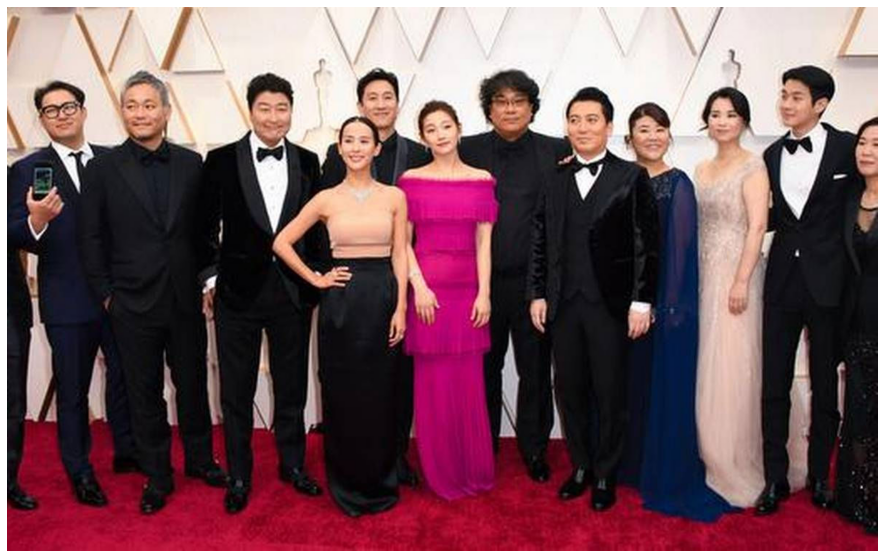

In [ ]:
# testing  local image
!./darknet detect cfg/yolov3-tiny-custom.cfg yolov3-tiny-custom_5000.weights "image7.jpg" -dont-show
imShow('predictions.jpg')